In [22]:
#Real estate data from Realtor.com load, clean, statistical analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('RealtorScraper.csv')

# Display first few rows
df.head()


,address/locality,address/postalCode,address/region,address/street,advertisers/0/address,advertisers/0/address/city,advertisers/0/address/country,advertisers/0/address/line,advertisers/0/address/postal_code,advertisers/0/address/state,...,taxHistory/18/market,taxHistory/18/tax,taxHistory/18/year,text,type,units,url,year_built,year_renovated,zoning
0,Crosby,56441,MN,Cr-30 Lot 13,NaN,AITKIN,USA,20 2ND ST NE,56431,NaN,...,NaN,NaN,NaN,You don't want to miss out on this stunning 2....,land,NaN,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN
1,Breezy Point,56472,MN,Castlewood Ct,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Excellent 2.5 acre lot in Breezy Point. Privat...,land,NaN,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN
2,Pequot Lakes,56472,MN,7170 29th Ave SW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,248.0,2006.0,"Nestled in nature, this stunning 5-bedroom, 4-...",single_family,NaN,https://www.realtor.com/realestateandhomes-det...,2021.0,NaN,NaN
3,Pequot Lakes,56472,MN,31468 Isabelle Dr,NaN,PEQUOT LAKES,US,31131 Wildwood Lane,56472,NaN,...,NaN,NaN,NaN,Completed and move-in ready Welcome to Trailsi...,single_family,NaN,https://www.realtor.com/realestateandhomes-det...,2025.0,NaN,NaN
4,Pequot Lakes,56472,MN,Gasink Rd,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Imagine building your new home on this beautif...,land,NaN,https://www.realtor.com/realestateandhomes-det...,NaN,NaN,NaN


In [30]:
# Create the new column 'Waterfront_Access'
df['is_waterfront'] = np.where(
    df['details/0/category'].str.contains('Waterfront and Water Access', na=False),
    1,  # Value if the string is found
    0   # Value if the string is not found
)

print(df['is_waterfront'].value_counts())



is_waterfront
0    379
1     70
Name: count, dtype: int64


In [32]:
# Columns to Keep
columns_to_keep = ['listPrice',
                      "address/locality",
    "address/postalCode",
    "address/region",
    "address/street",
    "advertisers/0/broker/name",
    "advertisers/0/email",
    "advertisers/0/name",
    "history/0/event_name",
    "history/0/price",
    "taxHistory/0/assessment/total",
    "buildingPermitsHistory", 
    "buildingPermitsHistory/0/permit_effective_date",
    "buildingPermitsHistory/0/permit_project_type_1",
    "details/0/category",
    "details/1/category",
    "lastSoldPrice",
    "lot_sqft",
    "type",
    "zoning", 'baths' , 'beds' , 'nearbySchools/schools/0/rating','is_waterfront']

# Keep only those columns
df_filt = df[columns_to_keep]


In [162]:
# Display first few rows
df_filt.head()

,listPrice,address/locality,address/postalCode,address/region,address/street,advertisers/0/broker/name,advertisers/0/email,advertisers/0/name,history/0/event_name,history/0/price,...,details/0/category,details/1/category,lastSoldPrice,lot_sqft,type,zoning,baths,beds,nearbySchools/schools/0/rating,is_waterfront
0,259900,Crosby,56441,MN,Cr-30 Lot 13,RE/MAX Results,mike.remaxnorthland@gmail.com,Mike Williams,Listed,259900,...,Waterfront and Water Access,Land Info,NaN,127195.0,land,NaN,0,NaN,6.0,1
1,35000,Breezy Point,56472,MN,Castlewood Ct,NaN,joelaudenbach@gmail.com,Joe R Laudenbach,Listed,35000,...,Land Info,Exterior and Lot Features,NaN,108900.0,land,NaN,0,NaN,8.0,0
2,625000,Pequot Lakes,56472,MN,7170 29th Ave SW,"Edina Realty, Inc.",albie@albiekuschel.com,"KUSCHEL, ALBIE",Price Changed,625000,...,Bedrooms,Other Rooms,77000.0,871200.0,single_family,NaN,4,5.0,4.0,0
3,339900,Pequot Lakes,56472,MN,31468 Isabelle Dr,NaN,kyle@woodstowatermn.com,Kyle Narveson,Listing removed,0,...,Bedrooms,Appliances,NaN,13068.0,single_family,NaN,2,2.0,6.0,0
4,119000,Pequot Lakes,56472,MN,Gasink Rd,"Edina Realty, Inc.",tammyschultz@edinarealty.com,Tammy Schultz,Price Changed,119000,...,Waterfront and Water Access,Land Info,NaN,110642.0,land,NaN,0,NaN,8.0,1


In [34]:
#descriptive statistics

df_filt[['listPrice', 'history/0/price' , 'lastSoldPrice' , 'baths' , 'beds' , 'nearbySchools/schools/0/rating','is_waterfront' ]].describe()



,listPrice,history/0/price,lastSoldPrice,baths,beds,nearbySchools/schools/0/rating,is_waterfront
count,4.490000e+02,4.490000e+02,1.130000e+02,449.000000,226.000000,427.000000,449.000000
mean,4.300874e+05,4.076921e+05,2.609864e+05,1.316258,3.309735,6.786885,0.155902
std,6.804411e+05,6.808292e+05,2.693572e+05,1.757059,1.718292,1.632710,0.363167
min,1.090000e+04,0.000000e+00,3.000000e+03,0.000000,0.000000,4.000000,0.000000
25%,7.990000e+04,6.500000e+04,7.750000e+04,0.000000,3.000000,6.000000,0.000000
50%,2.500000e+05,2.249000e+05,1.800000e+05,0.000000,3.000000,8.000000,0.000000
75%,5.499000e+05,5.250000e+05,3.449000e+05,2.000000,4.000000,8.000000,0.000000
max,9.995000e+06,9.995000e+06,1.475000e+06,21.000000,23.000000,8.000000,1.000000


In [36]:
summary = df_filt[['listPrice', 'lastSoldPrice', 'baths', 'beds','nearbySchools/schools/0/rating']].copy()


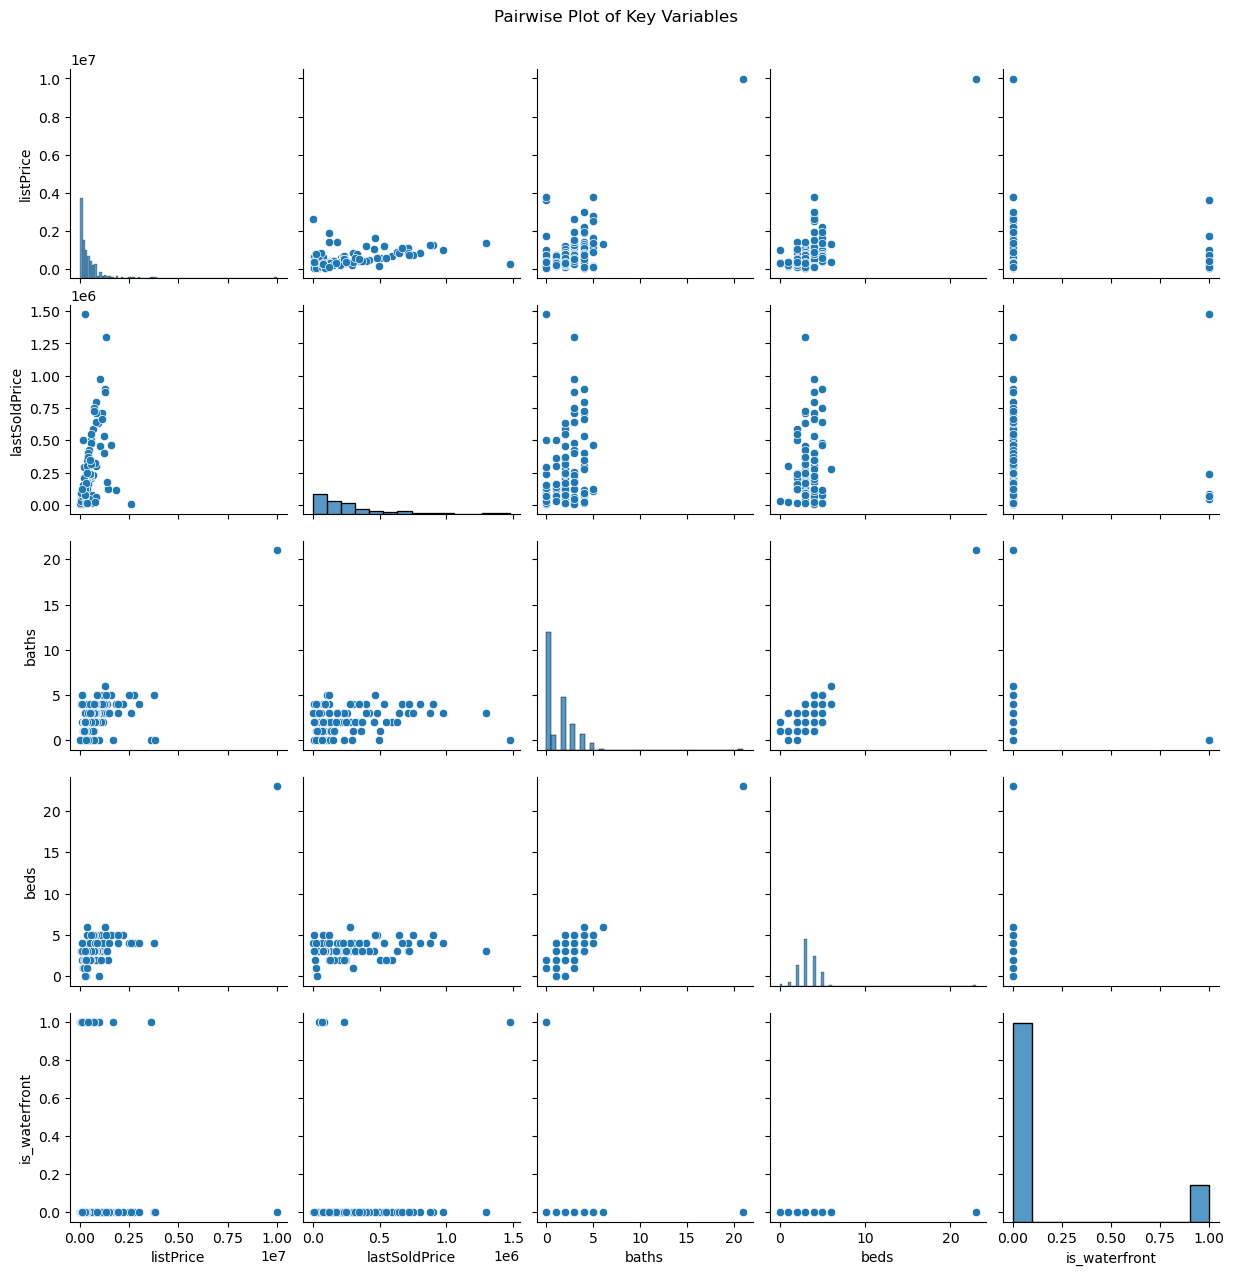

In [38]:
#visualize data
sns.pairplot(df_filt[['listPrice', 'lastSoldPrice', 'baths', 'beds','is_waterfront']])
plt.suptitle("Pairwise Plot of Key Variables", y=1.02)
plt.show()




In [40]:
# Select features and target
features = ['beds', 'baths', 'lot_sqft','is_waterfront','nearbySchools/schools/0/rating']
target = 'listPrice'

# Filter to only the rows with no missing values in these columns
df_reg = df_filt[features + [target]].dropna()

# Optional: ensure data types
df_reg[features + [target]] = df_reg[features + [target]].apply(pd.to_numeric, errors='coerce')


In [42]:
#start to build a model
import statsmodels.api as sm

X = df_reg[features]
y = df_reg[target]

# Add a constant (intercept) term to the model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# View the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              listPrice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     84.64
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           4.68e-43
Time:                        07:50:14   Log-Likelihood:                -3201.7
No. Observations:                 220   AIC:                             6413.
Df Residuals:                     215   BIC:                             6430.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\czapk\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [114]:
#testing scikit-learn for modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X = df_reg[features]
y = df_reg[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", dict(zip(features, lr.coef_)))


R² score: 0.6865798316479687
MSE: 641387095781.3337
Intercept: 24578.56196903228
Coefficients: {'beds': 44471.43480803052, 'baths': 196281.62948607144, 'lot_sqft': 0.03432008535567756}


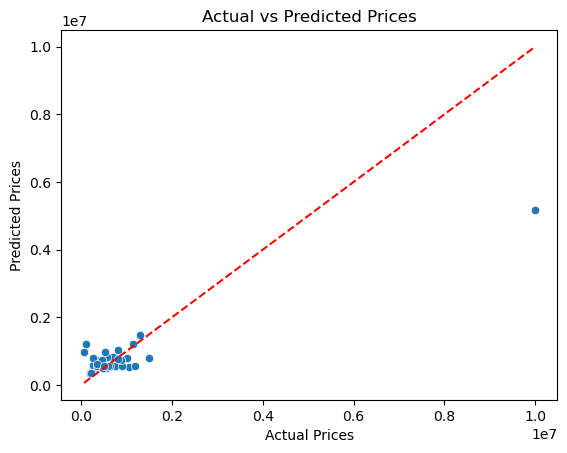

In [116]:
#visualize 
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [118]:
features = ['beds', 'baths', 'lot_sqft', 'nearbySchools/schools/0/rating']
target = 'listPrice'

df_reg = df[features + [target]].dropna()

# Optional: Convert all to numeric, in case any are object type
df_reg[features + [target]] = df_reg[features + [target]].apply(pd.to_numeric, errors='coerce')


In [120]:
import statsmodels.api as sm

X = sm.add_constant(df_reg[features])
y = df_reg[target]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              listPrice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     84.64
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           4.68e-43
Time:                        13:47:26   Log-Likelihood:                -3201.7
No. Observations:                 220   AIC:                             6413.
Df Residuals:                     215   BIC:                             6430.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [6]:
# Select your features (X) and target (y)
features = ['beds', 'baths', 'lot_sqft', 'is_waterfront', 'school_rating']
X = df_reg[features]
y = df_reg['list_price']

NameError: name 'df_reg' is not defined

In [82]:
#install to ensure excel export works
!pip install openpyxl


In [90]:
grouped = df_subset.groupby('postal_code')[
    ['median_listing_price', 'pending_ratio', 'median_days_on_market']
].mean().reset_index()


In [92]:
grouped.to_excel('postal_code_clusters.xlsx', index=False, engine='openpyxl')
